In [29]:
import history_rates as hr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.interpolate import interp1d
sns.set_theme()


### Getting the currency rates for the last 15 years

I am trying to get an idea about which day of a month has the best currency rate, 1..31.

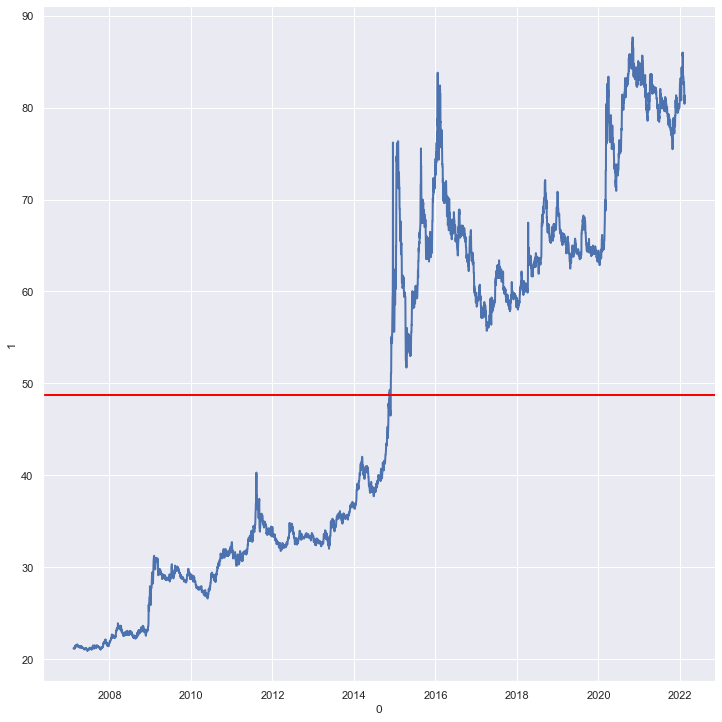

In [184]:
r = hr.FxtopRate('20220213', 'CHF', 'RUB', 15)
df = r.get_rates()
g = sns.relplot(data=df, kind="line", x=df[0], y=df[1], height=10,linewidth=2)
axes = g.axes.flatten()
for ax in axes:
    ax.axhline(df[1].mean(), ls='-', linewidth=2, color='red')
    
df['month'] = df[0].dt.strftime('%Y-%m')
dmin = df[[0,1,'month']].groupby('month').min(1)
dmax = df[[0,1,'month']].groupby('month').max(1)


### Histogram of the days on which the month's min is

Text(0, 0.5, 'Frequency')

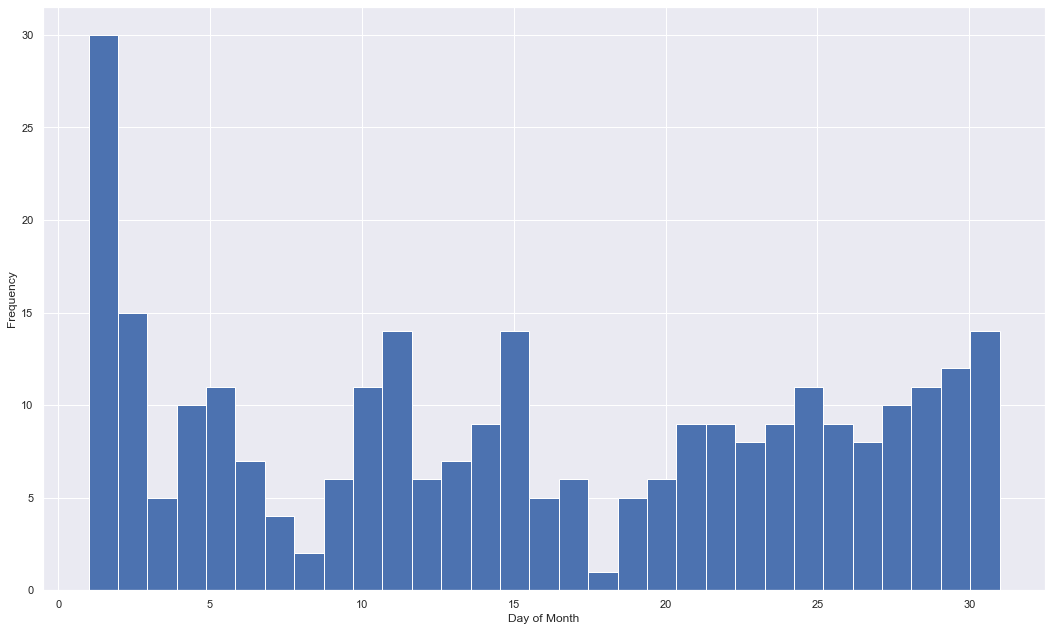

In [185]:
plt.hist(pd.merge(df, dmin, on=[1])[0].dt.day, bins=31)[0]
plt.xlabel("Day of Month")
plt.ylabel('Frequency')

### Histogram of the days on which the month's max is

Text(0, 0.5, 'Frequency')

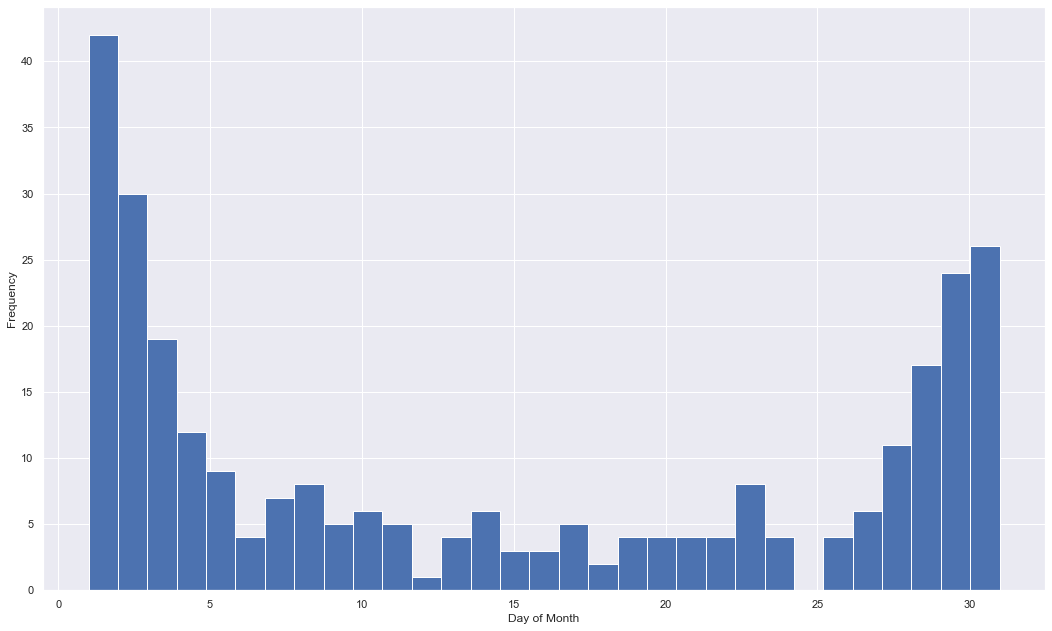

In [186]:
plt.hist(pd.merge(df, dmax, on=[1])[0].dt.day, bins=31)[0]
plt.xlabel("Day of Month")
plt.ylabel('Frequency')

We can see that the frequency of a max on a first day of the month is 42, 
the frequency of a min on a first day 
of a month is 30. 
Can we produce any kind of hypothesis about it?